In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## Reading the Data

In [3]:
# Importing "day.csv"

df = pd.read_csv(r"day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the data types, shape etc. for all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for missing values in columns

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Correcting data types

df[["instant","season","yr","mnth","holiday","weekday","workingday","weathersit"]] = df[["instant","season","yr","mnth","holiday","weekday","workingday","weathersit"]].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    object 
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 91.4+ KB


In [8]:
# Mapping string values to categorical columns

df["season"] = df["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"})
df["mnth"] = df["mnth"].replace({1:'January',2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
df["weekday"] = df["weekday"].replace({0:"Sunday",1:'Monday',2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
df["weathersit"] = df["weathersit"].replace({1:"Clear + Partly Cloudy",2:"Mist + Cloudy",3:"Light Precipitation",4:"Heavy Precipitation"})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Visualization

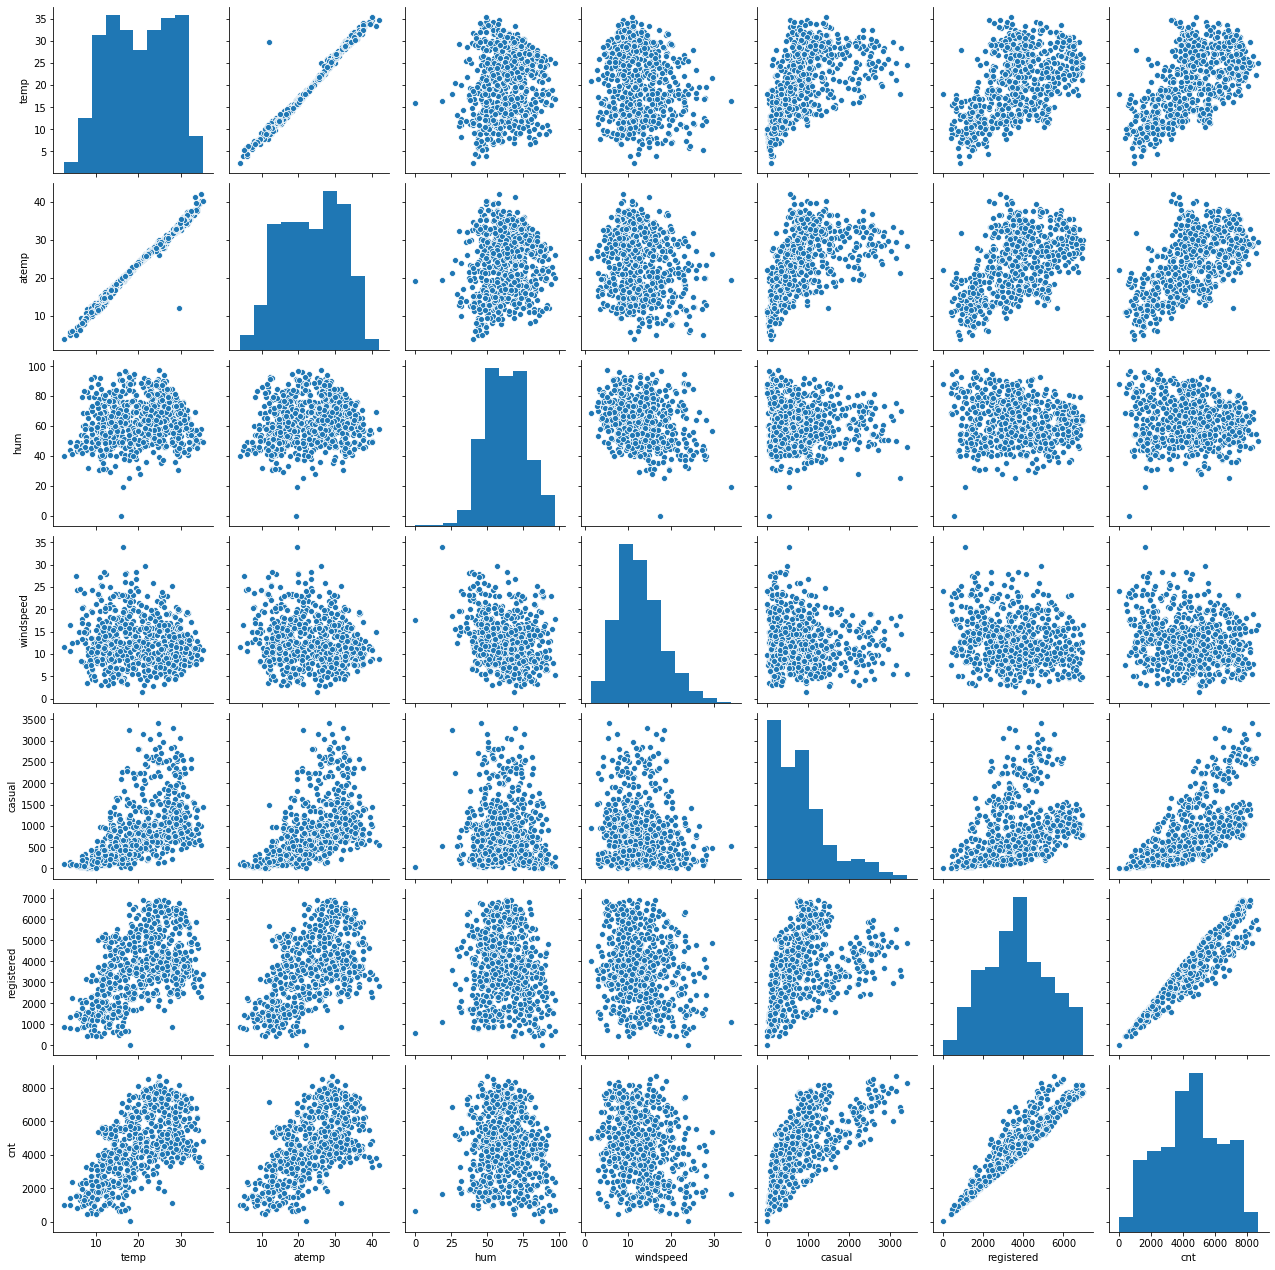

In [9]:
# Visualising numerical variables

sns.pairplot(df[["temp",'atemp',"hum","windspeed","casual","registered","cnt"]])
plt.show()

#### Following can be inferred from above:
#### 1. Casual + Registered = Cnt so we will consider Cnt in our model
#### 2. temp and atemp follow a very similar distribution so we will use atemp since it would affect the customers choice more than the actual temperature
#### 3. There is some linearity seen above between other variables and cnt so a linear regression model can be used

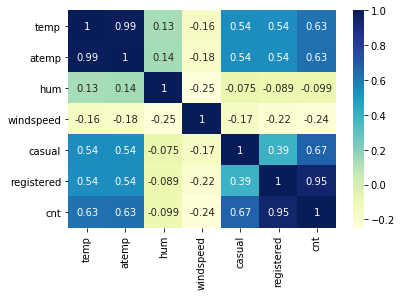

In [10]:
# Check correlations between numerical variables
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

#### Following can be inferred from above:
#### 1. atemp and temp are highly correlated with cnt
#### 2. casual and registered are highly correlated with cnt which is expected since sasual + registered = cnt

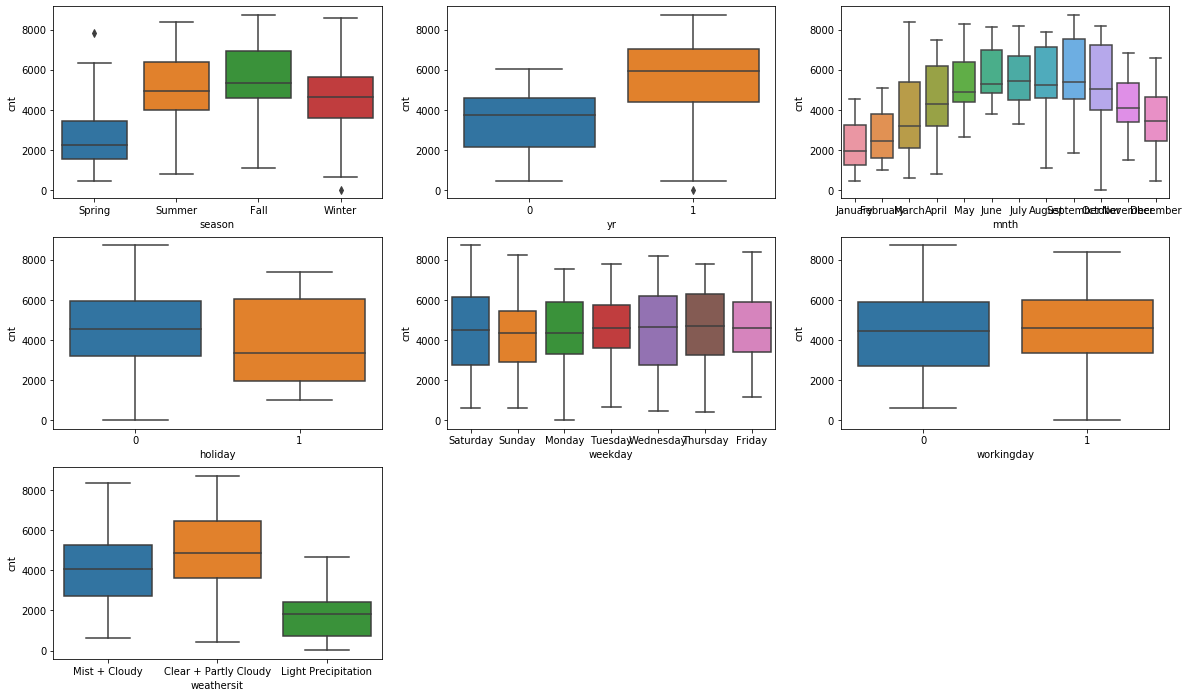

In [11]:
# Visulaising categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### Following can be inferred from above:
#### 1. Most bikes were rented in Fall season and in the year 2019
#### 2. May to October period most bikes were rented
#### 3. Most bikes were rented in misty and artly cloudy weather and least when light rains or snow

#### Chose "atemp" over "temp" because it would make more sense to look at feeling temperature rather than the actual temperature, since customer choice will depend upon feeling temperature rather than actual temperature

## Data Preparation

In [12]:
# Dropping columns which are of no use for model creation

df.drop(["instant","dteday","temp","casual","registered"],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,11.46350,43.6957,12.522300,1600


In [13]:
# Creating dummy variables for categorical variables

df1 = pd.get_dummies(df,columns=["season","mnth","weekday","weathersit"],drop_first=True)
df1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# Changing all data types to numeric

df1 = df1.apply(pd.to_numeric)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    int64  
 1   holiday                         730 non-null    int64  
 2   workingday                      730 non-null    int64  
 3   atemp                           730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_Spring                   730 non-null    uint8  
 8   season_Summer                   730 non-null    uint8  
 9   season_Winter                   730 non-null    uint8  
 10  mnth_August                     730 non-null    uint8  
 11  mnth_December                   730 non-null    uint8  
 12  mnth_February                   730 

In [15]:
# Dividing data into train and test sets

df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [16]:
# Rescaling atemp, hum, windspeed and cnt in df_train

scaler = MinMaxScaler()
df_train[['atemp','hum','windspeed','cnt']] = scaler.fit_transform(df_train[['atemp','hum','windspeed','cnt']])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
# Dividing df_train into X and y for model building

y_train = df_train.pop('cnt')
X_train = df_train

## Model Building

In [18]:
# Running RFE with output number of variables as 15

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

# Checking the columns which were deemed suitable by RFE for model building
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_July', 'mnth_November',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light Precipitation', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [19]:
# Creating X_train_ref with REF selecting variables

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Winter,mnth_July,mnth_November,mnth_September,weekday_Saturday,weekday_Sunday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,0,1,0,0,1


In [20]:
# Adding constant variable

X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.51e-188
Time:                        18:53:30   Log-Likelihood:                 509.28
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     495   BIC:                            -925.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [21]:
# Dropping constant

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

#### Rebuilding model after dropping holiday

In [22]:
# Dropping holiday since it is highly insignificant in presence of other variables as seen with the high p-value

X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.51e-188
Time:                        18:53:30   Log-Likelihood:                 509.28
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     495   BIC:                            -925.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Rebuilding model after dropping mnth_November

In [23]:
# Dropping mnth_November since it is insignificant in presence of other variables as seen with the high p-value

X_train_new = X_train_new.drop(["mnth_November"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.45e-188
Time:                        18:53:30   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [24]:
# Checking VIF for all variables of new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.41
2,atemp,17.30
1,workingday,17.00
9,weekday_Saturday,4.58
4,windspeed,4.48
10,weekday_Sunday,4.47
5,season_Spring,2.74
12,weathersit_Mist + Cloudy,2.28
0,yr,2.08
6,season_Winter,2.08


#### Rebuilding model after dropping hum

In [25]:
# Dropping hum since it has very high VIF when all variables are significant

X_train_new = X_train_new.drop(["hum"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.02e-186
Time:                        18:53:30   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [26]:
# Checking VIF for all variables of new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.33
2,atemp,12.33
3,windspeed,4.45
8,weekday_Saturday,3.81
9,weekday_Sunday,3.58
4,season_Spring,2.40
0,yr,2.07
5,season_Winter,1.74
11,weathersit_Mist + Cloudy,1.57
6,mnth_July,1.36


#### Rebuilding model after dropping workingday

In [27]:
# Dropping workingday since it has very high VIF when all variables are significant

X_train_new = X_train_new.drop(["workingday"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.79e-184
Time:                        18:53:31   Log-Likelihood:                 492.38
No. Observations:                 510   AIC:                            -960.8
Df Residuals:                     498   BIC:                            -909.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [28]:
# Checking VIF for all variables of new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.63
2,windspeed,3.94
0,yr,2.05
3,season_Spring,1.65
10,weathersit_Mist + Cloudy,1.51
4,season_Winter,1.41
5,mnth_July,1.35
7,weekday_Saturday,1.22
8,weekday_Sunday,1.21
6,mnth_September,1.19


#### Rebuilding model after dropping weekday_Saturday

In [29]:
# Dropping weekday_Saturday since it is insignificant in presence of other variables as seen with the high p-value

X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model

lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.63e-185
Time:                        18:53:31   Log-Likelihood:                 491.49
No. Observations:                 510   AIC:                            -961.0
Df Residuals:                     499   BIC:                            -914.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [30]:
# Checking VIF for all variables of new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.58
2,windspeed,3.91
0,yr,2.05
3,season_Spring,1.63
9,weathersit_Mist + Cloudy,1.51
4,season_Winter,1.40
5,mnth_July,1.35
6,mnth_September,1.19
7,weekday_Sunday,1.17
8,weathersit_Light Precipitation,1.08


#### Now since all variables are significant and VIF values are less than 5, we can consider this to be the final model with 10 parameters
#### R-squared is 83.1% and Adjusted R-squared is 82.7% which is very good to accept the model
#### Also, Prob (F-statistic) ~ 0 which indicates that the model is significant

## Validating Assumptions of Linear Regression

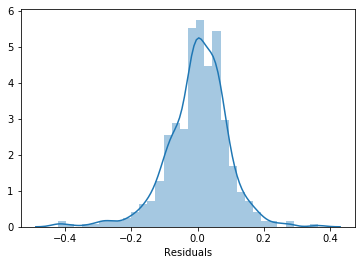

In [31]:
# Creating y_train_pred

y_train_pred = lm.predict(X_train_lm)

# Finding residuals

res = y_train - y_train_pred

# Visualizing distribution of residuals

sns.distplot(res)
plt.xlabel("Residuals")
plt.show()

#### Residuals are approximately normally distributed with mean centered at 0 and hence the model is valid

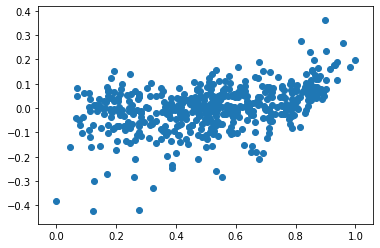

In [39]:
# Checking if error terms are independent of each other

plt.scatter(y_train,res)
plt.show()

#### There does not seem to be any sort of a pattern in the residuals, so the error terms are idependent of each other

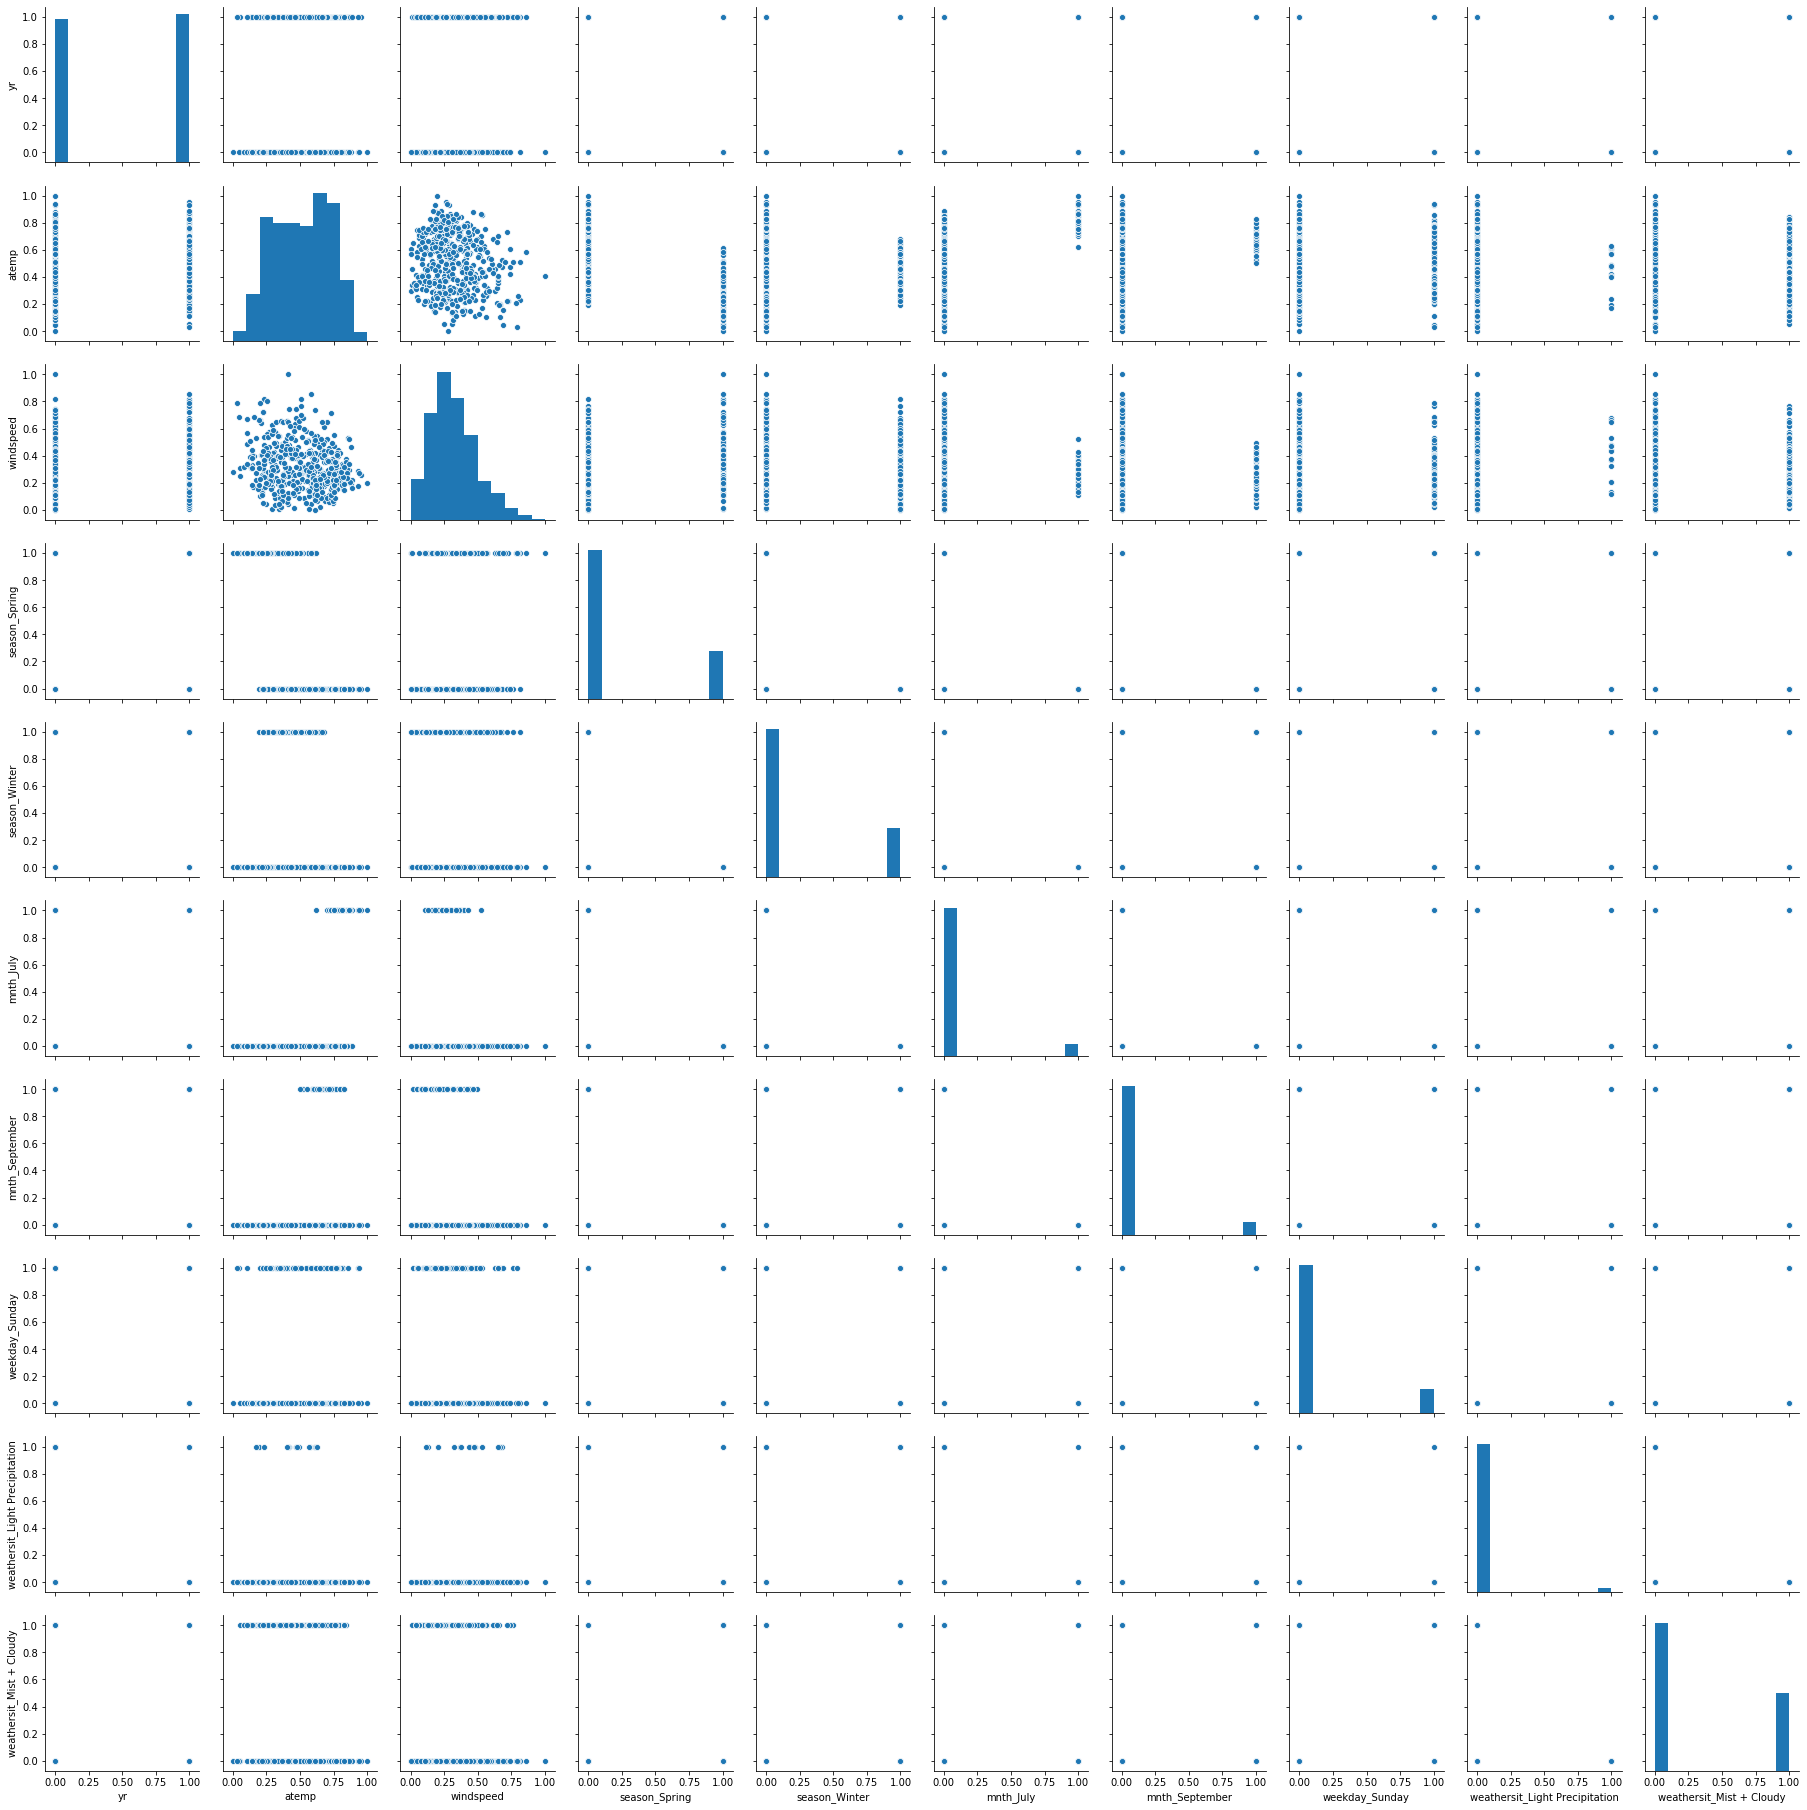

In [32]:
# Checking if there is linearity between any variable and cnt to verify if a linear regression model can be used

sns.pairplot(X_train_new)
plt.show()

#### There is no clear relationship between any of the variable in the final model, so there is no multicolinearity that exists

## Making Predictions Using the Final Model

In [33]:
# Rescaling atemp, hum, windspeed and cnt in df_test

df_test[['atemp','hum','windspeed','cnt']] = scaler.transform(df_test[['atemp','hum','windspeed','cnt']])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
# Dividing into X and y

y_test = df_test.pop('cnt')
X_test = df_test

In [35]:
# Creating X_test_new after droppping variables which are not there in the final model

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable

X_test_new = sm.add_constant(X_test_new)

# Making predictions using final model

y_test_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

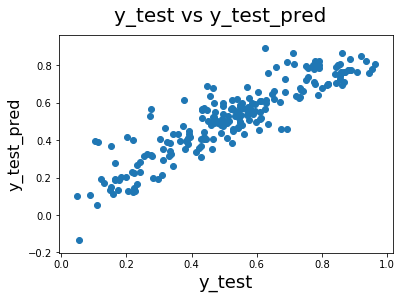

In [36]:
# Visualizing y_test vs y_test_pred

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

In [37]:
# R-squared value for the final model on test set

r2 = r2_score(y_test, y_test_pred)
print(r2)

0.8109701599700674


In [38]:
# Adjusted R-squared value for the final model on test set

Adj_r2 = 1-(1-r2)*((df_test.shape[0]-1)/(df_test.shape[0]-10-1))
print(Adj_r2)

0.8018821868917052


#### R-squared is 83.1% on train set and 81.1% on test set
#### Adjusted R-squared is 82.7% on train set and 80.2% on test set

#### These values are acceptable so the model is valid with 10 parameters namely:
 - yr
 - atemp
 - windspeed
 - season_Spring
 - season_Winter
 - mnth_July
 - mnth_September
 - weekday_Sunday
 - weathersit_Light Precipitation
 - weathersit_Mist + Cloudy

Let Xi denote the variables where i is the variable number in the above list, for example X1 denotes yr, X2 denotes atemp, etc.

We can see that the equation of our best fitted line based on the final model is:

$ cnt = 0.235  \times  X1 + 0.465  \times  X2 - 0.127  \times  X3 - 0.119 \times X4 + 0.038 \times X5 - 0.065 \times X6 + 0.055 \times X7 - 0.045 \times X8 - 0.283 \times X9 - 0.082 \times X10 $

 __Inferences obtained from above:__  
 - Count of total rental bikes (cnt) in year 2019 is 23.5% higher than that in 2018
 - Unit increase in feeling temperature increases cnt by 46.5%
 - Unit increase in windspeed decreases cnt by 12.7%
 - Cnt is 11.9% lower in Spring season
 - Cnt is 3.8% higher in Winter season
 - Cnt is 6.5% lower in the month of July
 - Cnt is 5.5% higher in the month of September
 - Cnt is 4.5% lower on Sundays
 - Cnt is 28.3% lower when there is light snow or rain
 - Cnt is 8.2% lower when the weather is misty and cloudy